In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-breed-identification/sample_submission.csv
/kaggle/input/dog-breed-identification/labels.csv
/kaggle/input/dog-breed-identification/test/09e51e17e2b756ff2ace8a87bd1443fa.jpg
/kaggle/input/dog-breed-identification/test/f7a32505c12649183c5991ecfa7d68b3.jpg
/kaggle/input/dog-breed-identification/test/bc6d50ffb4644feb34530aa58943e85b.jpg
/kaggle/input/dog-breed-identification/test/7cbc041e79135a572aad87904b5c9c57.jpg
/kaggle/input/dog-breed-identification/test/f3b603f10d6a344f0395fb46b242ff8e.jpg
/kaggle/input/dog-breed-identification/test/db55098d859d27a3c05b0e3fc41d43e7.jpg
/kaggle/input/dog-breed-identification/test/665bab06a3ea861c0812c778486988e3.jpg
/kaggle/input/dog-breed-identification/test/7b57911ea7559cebd6db308125926642.jpg
/kaggle/input/dog-breed-identification/test/df0d6ba158287cb2b3ed6459a22d42ba.jpg
/kaggle/input/dog-breed-identification/test/b80d89ad4a17ac2537ff46d251efcd7c.jpg
/kaggle/input/dog-breed-identification/test/06ecb29a374579fb320c1c7d2801cbe1.jp

In [2]:
model_id = "skyau/dog-breed-classifier-vit"

In [3]:
labels_csv = pd.read_csv("/kaggle/input/dog-breed-identification/labels.csv")
labels_csv.head

<bound method NDFrame.head of                                      id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]>

In [4]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
path = "/kaggle/input/dog-breed-identification/train/"
filenames = [path + fname + ".jpg" for fname in labels_csv["id"]]

In [6]:
import os
import datasets

def create_image_folder_dataset(root_path,labels_csv):
    img_data_files = []
    label_data_files = []

    for index, row in labels_csv.iterrows():
        img_class = row['breed']
        img_id = row['id']

        # Use the bitwise AND operator (&) for element-wise comparison
        matching_filenames = [filepath for filepath in filenames if os.path.splitext(os.path.basename(filepath))[0] == img_id]

        for filepath in matching_filenames:
            img_data_files.append(filepath)
            label_data_files.append(img_class)

    unique_labels = list(set(label_data_files))

    features = datasets.Features({
        "image": datasets.Image(),
        "label": datasets.features.ClassLabel(names=unique_labels),
    })

    ds = datasets.Dataset.from_dict({"image": img_data_files, "label": label_data_files}, features=features)
    return ds


In [7]:
dog_ds = create_image_folder_dataset(path,labels_csv)

In [8]:
img_class_labels = dog_ds.features["label"].names


In [9]:
example = dog_ds[10]
example

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>,
 'label': 14}

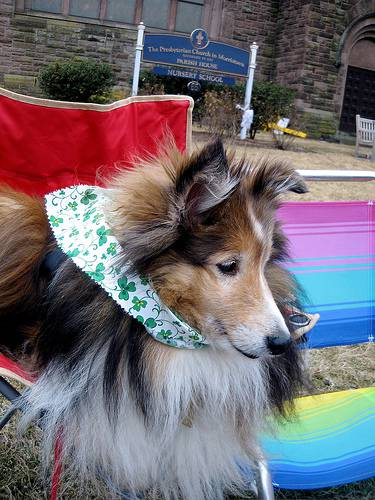

In [10]:
example['image']#cute ^^

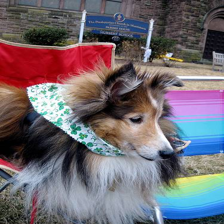

In [11]:
example['image'].resize((224, 224))

In [12]:
dog_ds = dog_ds.rename_column("label", "labels")

In [13]:
dog_ds.features["labels"]

ClassLabel(num_classes=120, names=['walker_hound', 'australian_terrier', 'toy_poodle', 'west_highland_white_terrier', 'cardigan', 'pug', 'german_shepherd', 'bloodhound', 'pembroke', 'eskimo_dog', 'english_foxhound', 'appenzeller', 'staffordshire_bullterrier', 'borzoi', 'shetland_sheepdog', 'lakeland_terrier', 'irish_wolfhound', 'tibetan_mastiff', 'cocker_spaniel', 'scottish_deerhound', 'african_hunting_dog', 'norfolk_terrier', 'giant_schnauzer', 'black-and-tan_coonhound', 'mexican_hairless', 'schipperke', 'miniature_poodle', 'toy_terrier', 'sealyham_terrier', 'basset', 'border_terrier', 'saint_bernard', 'lhasa', 'maltese_dog', 'standard_schnauzer', 'basenji', 'american_staffordshire_terrier', 'dandie_dinmont', 'dingo', 'english_setter', 'malamute', 'miniature_schnauzer', 'bouvier_des_flandres', 'norwich_terrier', 'chesapeake_bay_retriever', 'pomeranian', 'gordon_setter', 'english_springer', 'kerry_blue_terrier', 'bedlington_terrier', 'great_dane', 'entlebucher', 'siberian_husky', 'kees

In [14]:
labels = dog_ds.features["labels"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

id2label[2]

'toy_poodle'

In [15]:
from transformers import AutoImageProcessor

image_processor  = AutoImageProcessor.from_pretrained(model_id)
image_processor 

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [16]:
import cv2
import albumentations as A
import numpy as np

if "height" in image_processor.size:
    height = image_processor.size["height"]
    width = image_processor.size["width"]
    crop_size = (height, width)
    max_size = None
elif "shortest_edge" in image_processor.size:
    size = image_processor.size["shortest_edge"]
    crop_size = (size, size)
    max_size = image_processor.size.get("longest_edge")

train_transforms = A.Compose([
    A.Resize(height=crop_size[0], width=crop_size[1]),
    A.RandomRotate90(),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Normalize(),
])

val_transforms = A.Compose([
    A.Resize(height=crop_size[0], width=crop_size[1]),
    A.Normalize(),
])

def preprocess_train(examples):
    examples["pixel_values"] = [
        train_transforms(image=np.array(image))["image"] for image in examples["image"]
    ]

    return examples

def preprocess_val(examples):
    examples["pixel_values"] = [
        val_transforms(image=np.array(image))["image"] for image in examples["image"]
    ]

    return examples


In [17]:
# split up training into training + validation
splits = dog_ds.train_test_split(test_size=0.1)
train_ds = splits['train']
val_ds = splits['test']

In [18]:
train_ds.set_transform(preprocess_train)
val_ds.set_transform(preprocess_val)

In [19]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=438x500>,
 'labels': 61,
 'pixel_values': array([[[ 1.2556725 ,  0.85294116,  0.25220045],
         [ 1.2385477 ,  0.83543414,  0.23477125],
         [ 1.2727972 ,  0.8704482 ,  0.26962966],
         ...,
         [ 0.12543876, -0.03991594, -0.148671  ],
         [-0.01155926, -0.16246496, -0.27067536],
         [ 0.36518532,  0.22268908,  0.09533771]],
 
        [[ 1.2385477 ,  0.83543414,  0.23477125],
         [ 1.289922  ,  0.8879551 ,  0.28705883],
         [ 1.3070468 ,  0.90546215,  0.30448803],
         ...,
         [-0.3369296 , -0.565126  , -0.776122  ],
         [-0.08005828, -0.28501397, -0.49725488],
         [ 0.27956155,  0.06512607, -0.1312418 ]],
 
        [[ 1.3070468 ,  0.90546215,  0.30448803],
         [ 1.2556725 ,  0.85294116,  0.25220045],
         [ 1.2556725 ,  0.85294116,  0.25220045],
         ...,
         [ 2.1461596 ,  1.9908962 ,  1.7336819 ],
         [ 1.9920369 ,  1.8158263 ,  1.55939  

In [20]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

num_labels = len(id2label)
model = AutoModelForImageClassification.from_pretrained(
    model_id, 
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes = True, # provide this in case you'd like to fine-tune an already fine-tuned checkpoint
)

In [21]:
from datasets import load_metric

metric = load_metric("accuracy")

In [22]:
def collate_fn(batch):
    # Your collate function logic here
    return batch

# Define your compute_metrics function
def compute_metrics(p):
    # Your metric computation logic here
    return {"accuracy": accuracy_score(p.predictions, p.label_ids)}

In [35]:
model_name = model_id.split("/")[-1]
batch_size=64
args = TrainingArguments(
    f"{model_name}-finetuned-eurosat-albumentations",
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=0.001,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=20,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=False,
)

In [36]:
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [37]:
import torch

def collate_fn(examples):
    images = []
    labels = []
    for example in examples:
        image = np.moveaxis(example["pixel_values"], source=2, destination=0)
        images.append(torch.from_numpy(image))
        labels.append(example["labels"])
        
    pixel_values = torch.stack(images)
    labels = torch.tensor(labels)
    return {"pixel_values": pixel_values, "labels": labels}


In [38]:

trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

In [39]:
import torch

# Set the maximum GPU memory usage fraction
# fraction value should be between 0.0 and 1.0
max_memory_fraction = 0.8  # You can adjust this value
torch.cuda.set_per_process_memory_fraction(max_memory_fraction)




In [40]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,4.571100,4.071982,0.101662
2,2.767300,2.483978,0.339198
3,1.771100,1.747967,0.542522
4,1.158600,1.657544,0.554252
5,0.792700,1.561841,0.607038
6,0.566900,1.672229,0.575758
7,0.432000,1.614829,0.591398
8,0.323100,1.782202,0.584555
9,0.235700,1.723238,0.587488
10,0.192600,1.883775,0.586510


TrainOutput(global_step=720, training_loss=0.692130060840605, metrics={'train_runtime': 4137.2994, 'train_samples_per_second': 44.469, 'train_steps_per_second': 0.174, 'total_flos': 1.4272054379987927e+19, 'train_loss': 0.692130060840605, 'epoch': 20.0})

In [41]:
metrics = trainer.evaluate()
print(metrics)

{'eval_loss': 1.721379280090332, 'eval_accuracy': 0.6334310850439883, 'eval_runtime': 10.1137, 'eval_samples_per_second': 101.15, 'eval_steps_per_second': 1.582, 'epoch': 20.0}
